# Phase 1 Final Project: Aviation Accident Analysis

## Identifying the Safest Aircraft Makes and Models for Business Expansion

## Business Problem
As our company expands into the aviation industry, we need to make informed decisions about aircraft acquisitions. However, we lack sufficient knowledge about the risks associated with different aircraft makes and models for commercial and private operations. This analysis aims to identify the safest aircraft makes and models with the lowest accident rates, ensuring data-driven purchasing decisions.

## Project Objectives
- Analyze trends in aviation accidents over time.
- Identify common causes of aviation accidents.
- Examine accident distribution by aircraft make and model.
- Recommend the safest aircraft makes and models for purchase.

## Expected Outcomes:
- Insights into aviation accident trends and contributing factors.
- A comparative analysis of accident rates across different aircraft makes and models.
- Data-driven recommendations for acquiring the safest aircraft for business expansion.

## 1. Importing Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('ggplot')

## 2. Loading the Datasets

In [16]:
#loading our datasets, use encoding to handle encoding errors
df1 = pd.read_csv("AviationData.csv",  encoding ='latin1', low_memory=False)
df2 = pd.read_csv("USState_Codes.csv")

## 3. Data Understanding

In [18]:
#previewing first 5 rows of df1 dataset
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [19]:
##previewing first 5 rows of df2 dataset
df2.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


The datasets have been successfully loaded. The aviation dataset contains 31 columns, including accident details, locations, and fatalities. The state codes dataset provides abbreviations for U.S. states, which we will merge with the aviation dataset.

In [21]:
#checking the summary of our dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## 4. Data Cleaning and Preparation

lets clean the data, merge state names, and proceed with analysis

In [24]:
# Extract state abbreviations from the 'Location' column
df1['State_Abbreviation'] = df1['Location'].str.extract(r',\s*([A-Z]{2})$')

# Merge with state codes to get full state names
df1 = df1.merge(df2, left_on='State_Abbreviation', right_on='Abbreviation', how='left')

# Drop redundant abbreviation column
df1.drop(columns=['Abbreviation'], inplace=True)

# Rename the column for clarity
df1.rename(columns={'US_State': 'State'}, inplace=True)

# Check the updates
df1[['Location', 'State_Abbreviation', 'State']].head(5)

,Location,State_Abbreviation,State
0,"MOOSE CREEK, ID",ID,Idaho
1,"BRIDGEPORT, CA",CA,California
2,"Saltville, VA",VA,Virginia
3,"EUREKA, CA",CA,California
4,"Canton, OH",OH,Ohio


In [25]:
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State_Abbreviation,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA,Virginia
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA,California
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Ohio


The dataset now includes full state names instead of abbreviations, making it more readable.

In [27]:
# Checking for missing values
df1.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
State_Ab

We can clearly ascertain that there are missing values in our df1 dataset that need to be handled. We will focus only on the columns that align directly with our business problem and objectives.

### Handling Missing Data

Lets Drop columns with excessive missing values and Drop rows with missing critical information

In [31]:
# create a copy of our dataset
df1_copy = df1.copy()

In [32]:
#dropping columns with excessive missing values, that are unlikely to contribute meaningful insights to our analysis. 
df1_copy.drop(columns=['Latitude', 'Longitude', 'Schedule', 'Air.carrier', 'FAR.Description', 'Airport.Code','Broad.phase.of.flight','Airport.Name'], inplace=True)

In [33]:
# drop rows with missing values
df1_copy.dropna(inplace = True)

In [34]:
#confirming the changes 
df1_copy.shape

(19695, 25)

In [35]:
#lets check for duplicates and drop them if any
df1_copy.duplicated().sum()

0

The dataset is free from duplicates

In [37]:
#check for datatypes and modify any inconsistent dtypes
df1_copy.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Report.Status              object
Publication.Date           object
State_Abbreviation         object
State                      object
dtype: object

In [38]:
# Convert 'Event.Date' , 'Publication.Date' to datetime format and Amateur.Built to boolean
df1_copy['Event.Date'] = pd.to_datetime(df1_copy['Event.Date'], errors='coerce')
df1_copy['Publication.Date'] = pd.to_datetime(df1_copy['Publication.Date'], errors='coerce')
df1_copy["Amateur.Built"] = df1_copy["Amateur.Built"].str.strip().str.lower().map({"yes": True, "no": False})

df1_copy.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                       bool
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Report.Status                     object
Publication.Date          datetime64[ns]
State_Abbreviation                object
State           

In [39]:
# Display cleaned dataset
df1_copy.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,State_Abbreviation,State
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,N2482N,...,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,1982-01-01,WA,Washington
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,N7967Q,...,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,1982-01-01,NJ,New Jersey
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,N14779,...,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,1983-02-01,LA,Louisiana
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,N758SK,...,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,1983-02-01,TX,Texas
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,N4876K,...,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,1983-02-01,OK,Oklahoma


## 5. Data Analysis and visualization

### i. Trends in aviation accidents over time
We'll group the data by year and plot a line chart to observe trends.

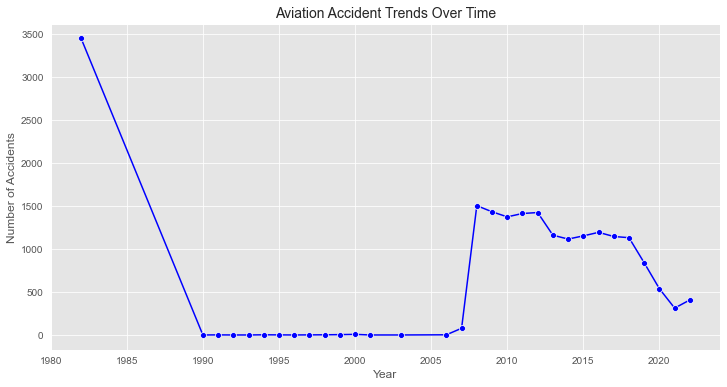

In [42]:

# Extract year from Event.Date
df1_copy["Year"] = df1_copy["Event.Date"].dt.year

# Count accidents per year
accidents_per_year = df1_copy.groupby("Year").size()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker="o", color="b")

plt.title("Aviation Accident Trends Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.grid(True)
plt.show()


The line chart illustrates the trend of aviation accidents from 1980 to the present.
- The number of aviation accidents was extremely high around 1980, reaching over 3,500 incidents. There was a dramatic drop in accidents by the late 1980s, suggesting significant improvements in aviation safety, regulatory measures, or changes in reporting practices.
- From the 1990s to early 2000s, the number of recorded accidents remained extremely low.
- A sharp increase in accidents occurred in the mid-2000s, reaching over 1,500 incidents per year. Possible reasons include changes in aviation traffic, an increase in aircraft operations, or more comprehensive accident reporting.
- After peaking, the accident rate fluctuates but remains relatively high until around 2020. A noticeable decline in accidents is observed in recent years, possibly due to advancements in aircraft safety, stricter regulations, or the impact of reduced air travel (e.g., due to the COVID-19 pandemic).

##### Insights for Business Decision-Making
- The overall trend suggests aviation safety has improved significantly since the 1980s.
- Recent declines in accidents indicate safer aircraft and better risk management, making this an opportune time for new investments in aviation.

### ii. Common causes of accidents

#### Accidents by number of engines
lets create a pivot table Summarizing accidents by engine count.

In [46]:
# Pivot table summarizing accidents by number of engines
engine_pivot = df1_copy.groupby("Number.of.Engines")["Event.Id"].count().reset_index()
engine_pivot.rename(columns={"Event.Id": "Accident Count"}, inplace=True)
engine_pivot

,Number.of.Engines,Accident Count
0,0.0,83
1,1.0,17899
2,2.0,1681
3,3.0,16
4,4.0,14
5,8.0,2


Number of accidents reduces by increased number of engines

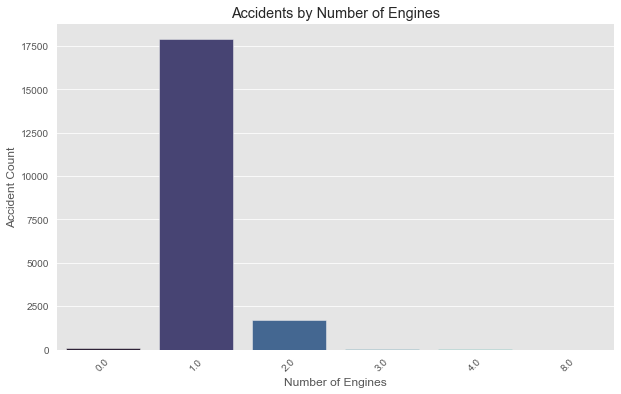

In [48]:
# Plot accidents by number of engines
plt.figure(figsize=(10, 6))
sns.barplot(data=engine_pivot, x="Number.of.Engines", y="Accident Count", palette="mako")

# Formatting
plt.title("Accidents by Number of Engines")
plt.xlabel("Number of Engines")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()

#### Accidents by Aircraft Damage

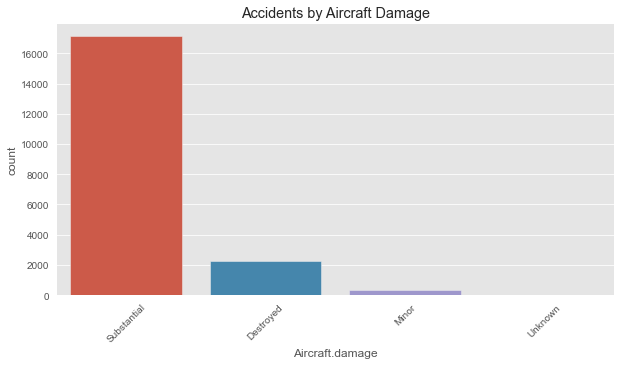

In [50]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df1_copy, x="Aircraft.damage")
plt.title("Accidents by Aircraft Damage")
plt.xticks(rotation=45)  
plt.show()

The bar chart shows the distribution of aviation accidents based on the extent of aircraft damage.
- "Substantial" damage is the most common category, with the highest number of incidents.
- "Destroyed" aircraft comes second but with significantly fewer occurrences.
- "Minor" and "Unknown" damage categories have the least incidents.
  
This suggests that while many accidents result in severe damage, total destruction is relatively rare.

#### Accidents by Purpose of Flight

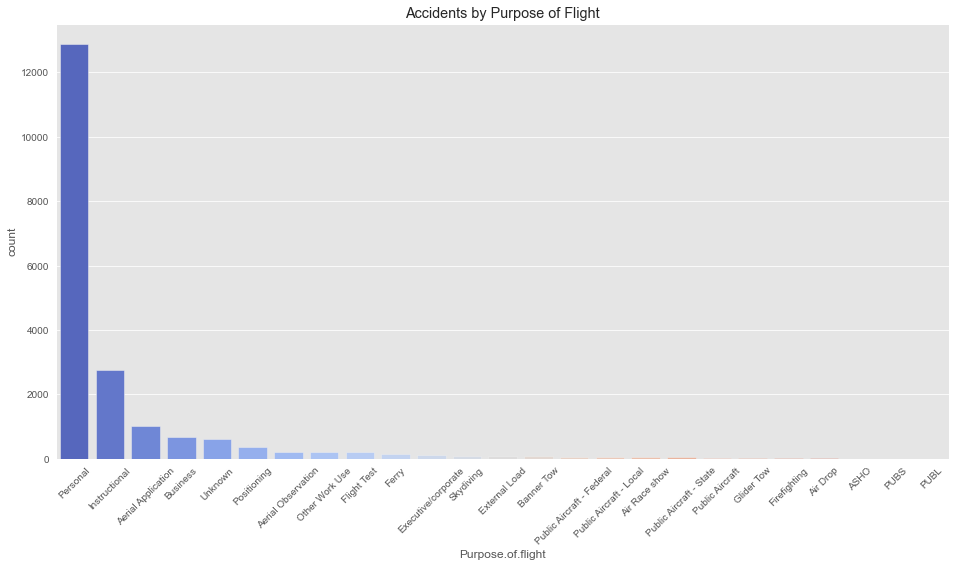

In [53]:
plt.figure(figsize=(16, 8))

# Sorting by count
sorted_purpose = df1_copy["Purpose.of.flight"].value_counts().index

sns.countplot(data=df1_copy, x="Purpose.of.flight", palette="coolwarm", order=sorted_purpose)
plt.title("Accidents by Purpose of Flight")
plt.xticks(rotation=45)
plt.show()

The Personal category has the highest number of accidents by a significant margin, followed by Instructional and Aerial Application flights. Business, Unknown, and Positioning flights also show notable accident counts, while other flight purposes, such as Air Race Show, Firefighting, and Public Aircraft operations, have minimal occurrences. This suggests that personal flights are the most prone to accidents, likely due to factors such as pilot experience, aircraft maintenance, or operational conditions.

#### Accidents by Weather Condition

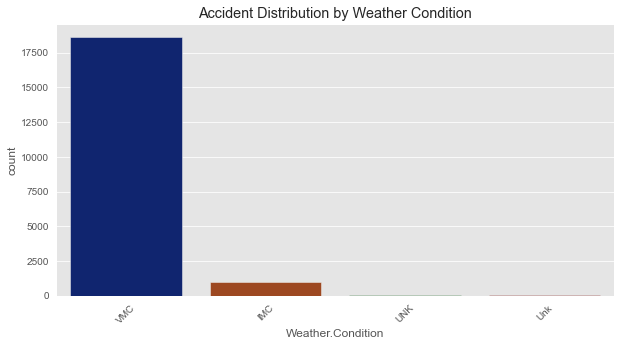

In [120]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df1_copy, x="Weather.Condition", palette="dark")
plt.title("Accident Distribution by Weather Condition")
plt.xticks(rotation=45)
plt.show()

The bar chart visualizes the distribution of aviation accidents based on weather conditions. The key observations include:

- IMC (Instrument Meteorological Conditions) has the highest number of accidents, significantly dominating the dataset.
- VMC (Visual Meteorological Conditions) shows a much smaller number of accidents compared to IMC.
- UNK (Unknown) and LNK (Likely Unknown) have very few recorded accidents, indicating incomplete or unclear data.

This suggests that most accidents occur under Instrument Meteorological Conditions, likely due to poor visibility and reliance on instruments rather than visual cues.

#### Accidents by Amateur Built Status

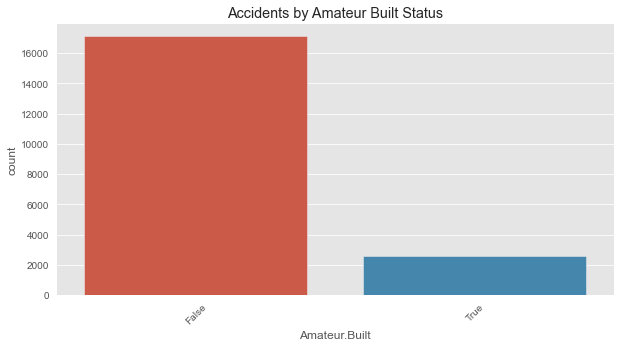

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df1_copy, x="Amateur.Built")
plt.title("Accidents by Amateur Built Status")
plt.xticks(rotation=45)
plt.show()

This bar chart displays the distribution of aviation accidents based on whether the aircraft was amateur-built or not.

- "False" (Not Amateur-Built) has the highest number of accidents, significantly outweighing the "True" category.
- "True" (Amateur-Built) has a noticeably lower count of accidents, but they still occur.

This suggests that most aviation accidents involve factory-built aircraft rather than amateur-built ones. However, the number of accidents in the amateur-built category is still significant, indicating that these aircraft may have unique risk factors.

### iii. Accident distribution by aircraft make and model.

To examine this we will group the data by aircraft make and model, counting the number of accidents, sort the results to highlight the most least accident-prone aircraft and visualize our findings.

In [63]:
# Grouping by Make and Model to count accidents
accident_distribution = df1_copy.groupby(["Make", "Model"]).size().reset_index(name="Accident Count")
accident_distribution.head()

,Make,Model,Accident Count
0,177MF LLC,PITTS MODEL 12,1
1,2007 Savage Air LLC,EPIC LT,1
2,2021FX3 LLC,CCX-2000,1
3,781569 INC,FX 210,1
4,AARDEMA ROBERT JOHN,1 AARDEMA RAG WNG SP,1


In [64]:
# Sorting by highest number of accidents
accident_distribution = accident_distribution.sort_values(by="Accident Count", ascending=False).head(20)
accident_distribution.head(10)

,Make,Model,Accident Count
1494,CESSNA,172,348
2005,Cessna,172,279
1995,Cessna,152,174
1517,CESSNA,172S,158
1486,CESSNA,152,157
1513,CESSNA,172N,138
1540,CESSNA,182,130
4807,PIPER,PA-18-150,124
4921,PIPER,PA28,117
1529,CESSNA,180,116


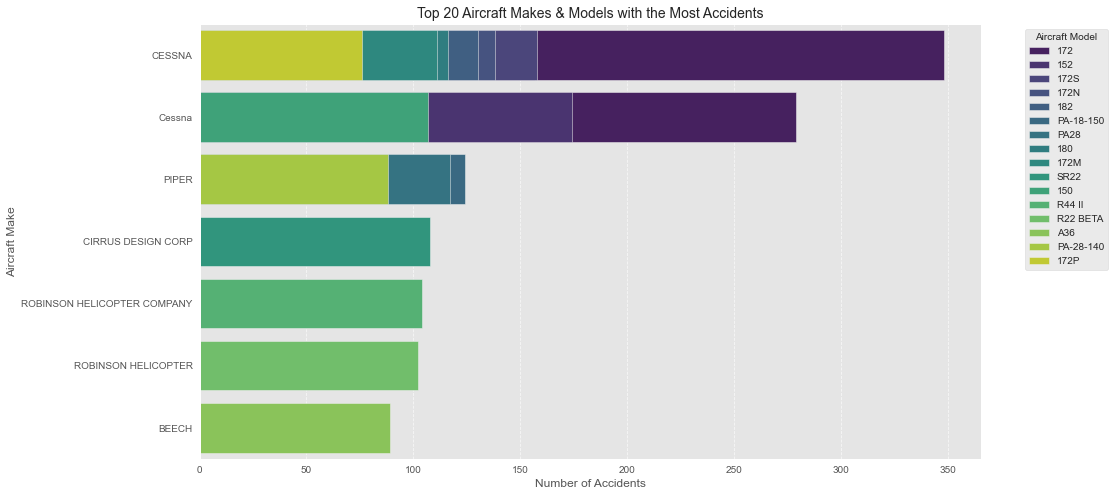

In [65]:
# Plotting the distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=accident_distribution, y="Make", x="Accident Count", hue="Model", dodge=False, palette="viridis")
plt.title("Top 20 Aircraft Makes & Models with the Most Accidents", fontsize=14)
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.legend(title="Aircraft Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

#### Insights:
- Cessna dominates accident counts, indicating that it is either the most commonly used aircraft and has higher accident rates.
- Robinson Helicopters (R22 & R44 models) also appear frequently, suggesting potential safety concerns or high usage.
- The distribution suggests that certain models within a brand (e.g., Cessna 172, Piper PA-28) significantly contribute to accident numbers.

#### Business Recommendations:
- Avoid using high-accident aircraft models like the Cessna 172 and Piper PA-28 for business expansion.
- Investigate why Cessna has so many accidents (e.g., pilot error, aircraft age, mechanical failure).
- Consider alternative aircraft with fewer recorded accidents for lower-risk operations.

#### Aircraft makes & models with the least accidents

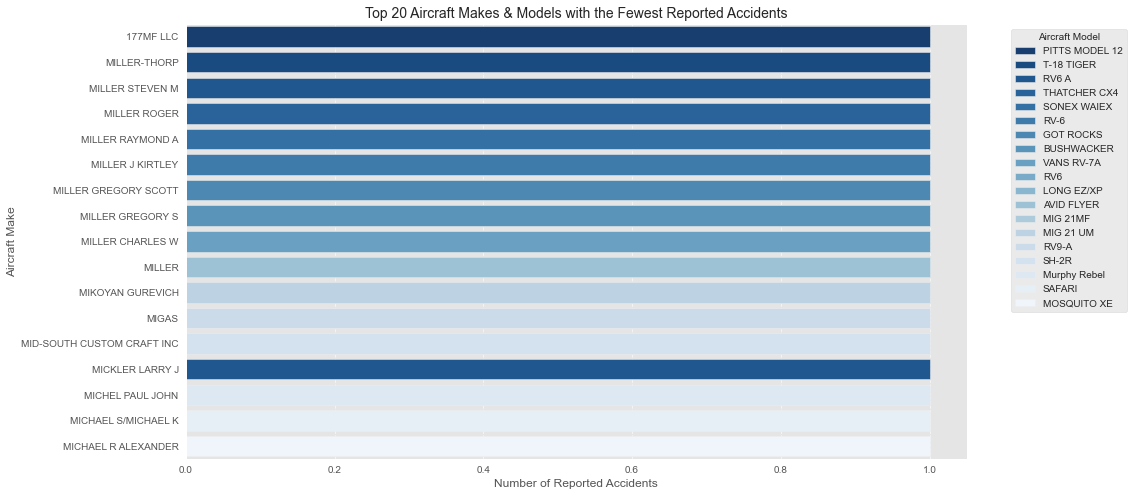

In [68]:
# Get aircraft makes & models with the least accidents
safest_aircraft = df1_copy.groupby(["Make", "Model"]).size().reset_index(name="Accident Count")

# Filter to the lowest accident counts
safest_aircraft = safest_aircraft.sort_values(by="Accident Count", ascending=True).head(20)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=safest_aircraft, y="Make", x="Accident Count", hue="Model", dodge=False, palette="Blues_r")
plt.title("Top 20 Aircraft Makes & Models with the Fewest Reported Accidents", fontsize=14)
plt.xlabel("Number of Reported Accidents")
plt.ylabel("Aircraft Make")
plt.legend(title="Aircraft Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

#### Insights:
- These aircraft have the lowest accident reports, making them potentially safer choices. Some models, like Mosquito XE and MIG aircraft, have military or specialized uses, possibly leading to fewer civilian accident reports. Some aircraft manufacturers listed might be smaller brands with fewer total flights, contributing to fewer recorded incidents.

#### Business Recommendations:
- Consider these aircraft models for lower-risk operations, as they have fewer reported accidents also investigate operational costs and availability, as some may be rare or not suited for business expansion.
- Cross-check safety records with usage statistics, ensuring the low accident count is due to safety and not underreporting.

In [70]:
# Sort by least accidents
safest_aircraft = accident_distribution.sort_values(by="Accident Count", ascending=True).head(20)
safest_aircraft.head()

,Make,Model,Accident Count
1514,CESSNA,172P,76
2022,Cessna,172N,77
4839,PIPER,PA-28-140,88
725,BEECH,A36,89
5505,ROBINSON HELICOPTER,R22 BETA,102


In [71]:
# Pivot table summarizing accidents by aircraft model
model_pivot = df1_copy.groupby("Model")["Event.Id"].count().reset_index()
model_pivot.rename(columns={"Event.Id": "Accident Count"}, inplace=True)

# Sorting in descending order
model_pivot = model_pivot.sort_values(by="Accident Count", ascending=False)

# Display the top models with the most accidents
model_pivot.head(10)


,Model,Accident Count
115,172,628
82,152,331
175,182,233
138,172N,215
2976,PA28,186
160,180,185
65,150,174
144,172S,172
137,172M,162
2860,PA-28-140,160


#### visualization of the top 10 aircraft models with the most accidents:

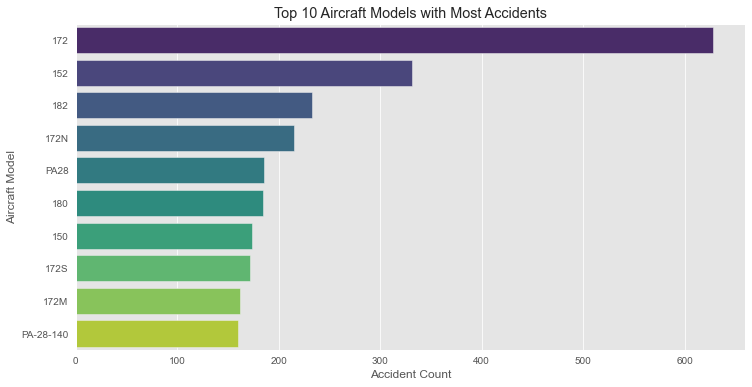

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(data=model_pivot.head(10), x="Accident Count", y="Model", palette="viridis")
plt.title("Top 10 Aircraft Models with Most Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Aircraft Model")
plt.show()

#### Analyzing Accident Distribution by Aircraft Manufacturer (Make)
We can analyze the accident distribution by aircraft manufacturers to see which brands have the highest number of accidents.



In [75]:
# Pivot table summarizing accidents by aircraft make (manufacturer)
make_pivot = df1_copy.groupby("Make")["Event.Id"].count().reset_index()
make_pivot.rename(columns={"Event.Id": "Accident Count"}, inplace=True)

# Sorting in descending order
make_pivot = make_pivot.sort_values(by="Accident Count", ascending=False)

# Display the top manufacturers with the most accidents
make_pivot.head(10)


,Make,Accident Count
591,CESSNA,3578
2357,PIPER,2137
742,Cessna,2071
2422,Piper,1156
302,BEECH,686
486,Beech,401
310,BELL,298
2565,ROBINSON HELICOPTER,192
2066,MOONEY,188
50,AIR TRACTOR INC,172


#### visualization of top 10 aircraft manufacturers with the most accidents:

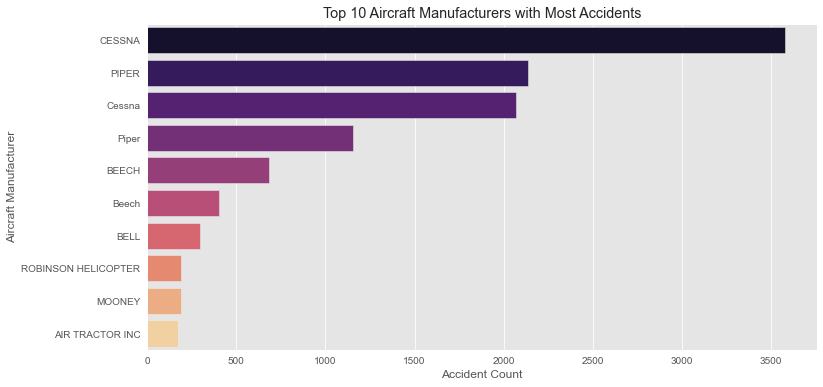

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(data=make_pivot.head(10), x="Accident Count", y="Make", palette="magma")
plt.title("Top 10 Aircraft Manufacturers with Most Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Aircraft Manufacturer")
plt.show()

### iv. analyzing commercial vs. private aircraft accidents

#### First we will differentiate between Commercial and Private Use. We'll categorize the "Purpose.of.flight" into Commercial and Private groups.
- Commercial: Includes categories like "Airline", "Cargo", "Commuter", "Charter"
- Private: Includes "Personal", "Business", "Training", "Recreational"

In [141]:
df1_copy['Purpose.of.flight'].value_counts()

Personal                     12872
Instructional                 2751
Aerial Application            1007
Business                       671
Unknown                        609
Positioning                    361
Aerial Observation             216
Other Work Use                 208
Flight Test                    193
Ferry                          151
Executive/corporate            120
Skydiving                       94
External Load                   72
Banner Tow                      68
Public Aircraft - Federal       63
Public Aircraft - Local         54
Air Race show                   52
Public Aircraft - State         46
Public Aircraft                 33
Glider Tow                      30
Firefighting                    13
Air Drop                         6
ASHO                             2
PUBS                             2
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [143]:
# Categorize flights into Commercial vs. Private
def categorize_flight(purpose):
    commercial_types = ["Aerial Application", "Aerial Observation", "Air Drop", "Air Race show", "Banner Tow", 
                        "Executive/corporate", "External Load", "Ferry", "Flight Test", "Firefighting",
                        "Glider Tow", "Instructional", "Positioning", "Public Aircraft", 
                        "Public Aircraft - Federal", "Public Aircraft - Local", "Public Aircraft - State","Skydiving"]
    
    private_types = ["Personal", "Business", "Unknown", "Other Work Use", "ASHO", "PUBS", "PUBL"]
    
    if purpose in commercial_types:
        return "Commercial"
    elif purpose in private_types:
        return "Private"
    else:
        return "Other"

# Apply categorization
df1_copy["Flight_Type"] = df1_copy["Purpose.of.flight"].apply(categorize_flight)

# Count accidents per category
accident_counts = df1_copy["Flight_Type"].value_counts()
print(accident_counts)

Private       14365
Commercial     5330
Name: Flight_Type, dtype: int64


#### Secondly, lets Analyze Accident Rates for Commercial vs. Private Aircraft by comparing accident rates by total number of accidents and injury severity.

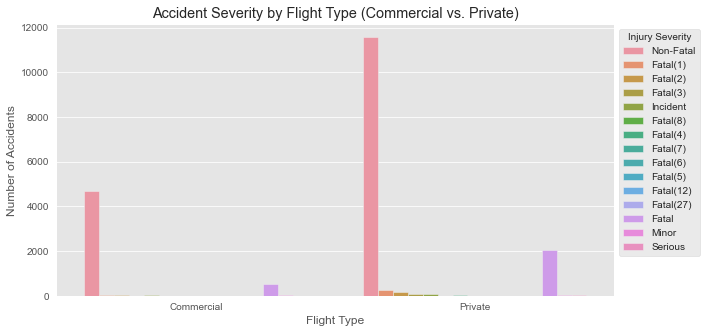

In [145]:
# Count accidents by Flight_Type and Injury Severity
plt.figure(figsize=(10, 5))
sns.countplot(data=df1_copy, x="Flight_Type", hue="Injury.Severity", order=["Commercial", "Private"])
plt.title("Accident Severity by Flight Type (Commercial vs. Private)")
plt.xlabel("Flight Type")
plt.ylabel("Number of Accidents")
plt.legend(title="Injury Severity", bbox_to_anchor=(1,1))
plt.show()

Key Observation:
1. Higher Accident Count in Private Flights:
- Private flights show significantly more accidents than commercial flights, especially for non-fatal incidents.
- This may suggest a higher volume of private flights or a lack of strict safety regulations in private aviation.
2. Fatality Distribution:
- Fatal accidents are present in both categories, but we need to check if private flights have a higher proportion of fatal accidents compared to their total number of flights.
- Private aviation might have a higher fatality rate due to less experienced pilots, fewer safety checks, and maintenance gaps.
3. Commercial Accidents:
- Even though commercial flights have fewer accidents, the cause of accidents might be more related to mechanical failures, airline operational risks, or bad weather conditions.

#### Thirdly, Lets Identify the Safest Aircraft Models for Each Category
We'll filter the dataset by "Make" and "Model" with low accident counts

In [168]:
# Set a threshold for minimum accident count
min_accidents = 10  

# Identify safest commercial aircraft models with at least min_accidents
safe_commercial = df1_copy[df1_copy["Flight_Type"] == "Commercial"]["Model"].value_counts()
safe_commercial = safe_commercial[safe_commercial >= min_accidents].nsmallest(5)
print("Safest Commercial Aircraft Models:")
print(safe_commercial)

# Identify safest private aircraft models with at least min_accidents
safe_private = df1_copy[df1_copy["Flight_Type"] == "Private"]["Model"].value_counts()
safe_private = safe_private[safe_private >= min_accidents].nsmallest(5)
print("Safest Private Aircraft Models:")
print(safe_private)

Safest Commercial Aircraft Models:
208B         10
SPORTSTAR    10
182P         10
PA-31-350    10
PA-38        10
Name: Model, dtype: int64
Safest Private Aircraft Models:
100             10
RV-9A           10
PA-32R-301      10
A-1C-200        10
SPORTCRUISER    10
Name: Model, dtype: int64


In [174]:
# Accident severity breakdown by aircraft model and flight type
severity_analysis = df1_copy.groupby(["Model", "Flight_Type"])['Injury.Severity'].value_counts().unstack().fillna(0)
print("\nAccident Severity Analysis by Aircraft Model:")
print(severity_analysis.head(10))  # Display top 10 for readability


Accident Severity Analysis by Aircraft Model:
Injury.Severity                   Fatal  Fatal(1)  Fatal(12)  Fatal(2)  \
Model                Flight_Type                                         
(SOLOY CONVERSION)   Commercial     0.0       0.0        0.0       0.0   
0-47B                Private        0.0       0.0        0.0       0.0   
0-58A                Private        0.0       0.0        0.0       0.0   
0-58B                Private        0.0       0.0        0.0       0.0   
0-77                 Private        0.0       0.0        0.0       0.0   
1                    Private        0.0       0.0        0.0       0.0   
1 AARDEMA RAG WNG SP Private        0.0       0.0        0.0       0.0   
1-126E               Private        0.0       0.0        0.0       0.0   
1-A                  Private        1.0       0.0        0.0       0.0   
10                   Private        0.0       0.0        0.0       0.0   

Injury.Severity                   Fatal(27)  Fatal(3)  Fatal(4) 

For business expansion, prioritize commercial aircraft models with zero fatal incidents and high survival rates, avoid high-risk models with multiple fatalities, and further assess private aircraft safety factors like pilot experience and maintenance.

#### Finaly lets compare risk factors by analyzing causes of accidents in each category

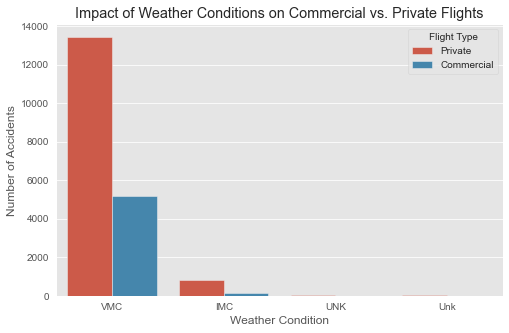

In [160]:
# Compare Weather Conditions Impact
plt.figure(figsize=(8,5))
sns.countplot(data=df1_copy, x="Weather.Condition", hue="Flight_Type")
plt.title("Impact of Weather Conditions on Commercial vs. Private Flights")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.legend(title="Flight Type")
plt.show()

Most accidents occur under VMC (Visual Meteorological Conditions), with private flights experiencing a significantly higher number of accidents than commercial flights. This suggests that factors other than weather—such as maintenance, or operational procedures—play a critical role in private flight safety.

For business expansion, prioritize commercial aircraft over private ones due to their lower accident rates under similar weather conditions. Additionally, if private flights are considered, implement stricter safety protocols, including enhanced pilot training and rigorous maintenance checks.

## Recommendations:
To minimize operational risks and enhance business success in aviation expansion, prioritize commercial aircraft over private ones, as they exhibit lower accident rates under similar conditions. If private flights are considered, enforce stricter safety protocols, including enhanced pilot training, rigorous maintenance checks, and advanced weather monitoring systems. Additionally, invest in aircraft models with historically lower accident rates and operate primarily in favorable weather conditions (VMC) to reduce incident likelihood.

## Conclusion:
By leveraging data-driven insights from aviation accident analysis, our business can strategically select safer aircraft models, optimize operational procedures, and mitigate risks associated with adverse weather and human factors. Implementing these recommendations will ensure cost efficiency, regulatory compliance, and long-term sustainability in the aviation sector.